# Simulasi Regresi dan Klasifikasi
## 18 Maret 2019

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#bangkitkan data berdistriusi normal
err=np.random.normal(loc=0,scale=50,size=200)
print(err[:10])

[ 19.07804304 -10.52132026  14.27156465  18.12369278 -71.32869566
  45.55331201  24.22592911  52.46045033   4.75473408  14.38839216]


C:\Users\NURUL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


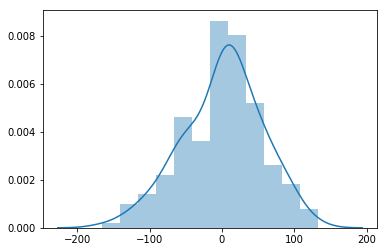

In [3]:
sns.distplot(err, norm_hist=True, kde=True)
plt.show()

In [4]:
x=np.linspace(start=1, stop=100, num=200)
print(x[:10])

[1.         1.49748744 1.99497487 2.49246231 2.98994975 3.48743719
 3.98492462 4.48241206 4.9798995  5.47738693]


In [5]:
y=3+10*x+err
print(y[:10])

[ 32.07804304   7.45355411  37.22131339  46.04831589 -38.42919818
  83.42768387  67.07517534 100.28457093  57.55372905  72.16226151]


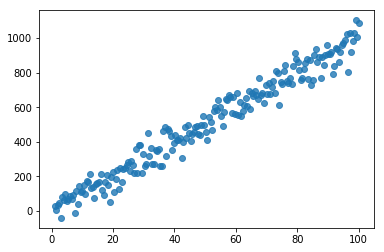

In [6]:
sns.regplot(x,y, fit_reg=False)
plt.show()

## Statsmodel OLS

In [7]:
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS

In [8]:
data=pd.DataFrame({'y':y,'x':x})
data.head()

,y,x
0,32.078043,1.000000
1,7.453554,1.497487
2,37.221313,1.994975
3,46.048316,2.492462
4,-38.429198,2.989950


In [9]:
data=add_constant(data)
data.head()

,const,y,x
0,1.0,32.078043,1.000000
1,1.0,7.453554,1.497487
2,1.0,37.221313,1.994975
3,1.0,46.048316,2.492462
4,1.0,-38.429198,2.989950


In [10]:
model = OLS(data['y'],data[['const','x']])
result=model.fit()

In [11]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     5346.
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          3.11e-145
Time:                        09:11:45   Log-Likelihood:                -1085.5
No. Observations:                 200   AIC:                             2175.
Df Residuals:                     198   BIC:                             2182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9698      7.916      0.754      0.4

## Feature selection

### Removing feature with low variance

In [12]:
from sklearn.feature_selection import VarianceThreshold

In [13]:
#Var[X] = p(1-p)
X=[[0,0,1],[0,1,0],[1,0,0],[0,1,1],[0,1,0],[0,1,1]]
sel=VarianceThreshold(threshold=(.8*(1-.8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

### L1-based feature selection (LASSO)

In [14]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

In [15]:
iris=load_iris()
X, y=iris.data, iris.target
X.shape

(150, 4)

In [16]:
lsvc=LinearSVC(C=0.01, penalty='l1', dual=False).fit(X,y)
model=SelectFromModel(lsvc, prefit=True)
X_new=model.transform(X)
X_new.shape

C:\Users\NURUL\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(150, 3)